# Plastic Pollution Country Data 2023

This dataset provides a detailed analysis of <b>global plastic waste production and management across 165 countries for the year 2023.</b> The data encompasses multiple aspects of plastic waste handling, from production volumes to recycling efficiency and environmental risk assessment.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read CSV

global_waste_df = pd.read_csv("Data sets/plastic_waste_country_data_2023.csv")

In [3]:
global_waste_df.columns

Index(['Country', 'Total_Plastic_Waste_MT', 'Main_Sources', 'Recycling_Rate',
       'Per_Capita_Waste_KG', 'Coastal_Waste_Risk'],
      dtype='object')

In [6]:
global_waste_df.isnull().sum()

Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

In [7]:
global_waste_df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


<h1> Top plastic producing countries (in MT) </H1>

In [4]:
## Choropleth -- mapping countries by Total Plastic Waste MT 

fig = px.choropleth(global_waste_df,
                    locations="Country",  # Column with country names
                    locationmode="country names",  # Ensures Plotly recognizes the country names
                    color="Total_Plastic_Waste_MT",  # Column with the values to map
                    hover_name="Country",  # Column to show on hover
                    color_continuous_scale="Reds",  # Color scale (you can try other scales like 'Plasma' or 'Cividis')
                    title="Global Plastic Waste 2023")

fig.show()

In [ ]:
## top 5 per total plastic waste MT

top_5 = global_waste_df.nlargest(5, 'Total_Plastic_Waste_MT')
top_5

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [166]:
## top 10 per total plastic waste MT

top_10 = global_waste_df.nlargest(10, 'Total_Plastic_Waste_MT')
top_10

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,NaN
1,United States,42.02,Packaging_Consumer,32.1,127.5,NaN
2,India,26.33,Consumer_Goods,11.5,19.3,NaN
3,Japan,7.99,Packaging_Electronics,84.8,63.2,NaN
4,Germany,6.28,Automotive_Packaging,56.1,75.6,NaN
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,NaN
6,Indonesia,5.85,Food_Packaging,11.8,21.3,NaN
7,Russia,5.84,Industrial_Consumer,5.6,40.2,NaN
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,NaN
9,France,4.98,Packaging_Consumer,27.3,73.1,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

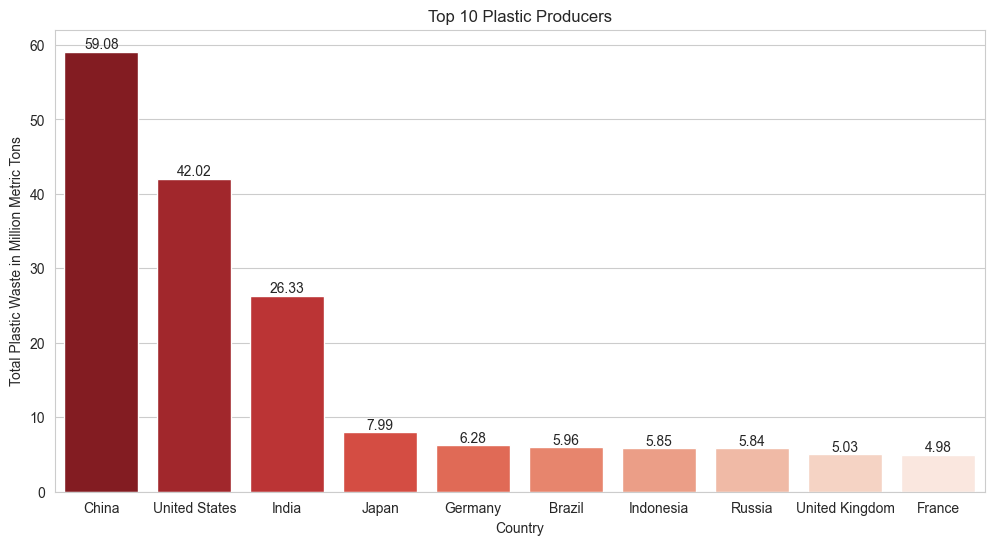

In [170]:
## Barplot for Top 5 countries 

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10, x='Country', y='Total_Plastic_Waste_MT', palette='Reds_r')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Top 10 Plastic Producers')
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste in Million Metric Tons')
#plt.xticks(rotation=90)
plt.show

In [54]:
least_5 = global_waste_df.nsmallest(5, 'Total_Plastic_Waste_MT').sort_values(by='Total_Plastic_Waste_MT', ascending=True)
least_5

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
110,Seychelles,0.01,Consumer_Packaging,18.9,101.2,High
112,Sao Tome and Principe,0.01,Consumer_Packaging,0.8,45.2,High
135,Western Sahara,0.01,Consumer_Packaging,0.2,18.5,High
157,Samoa,0.01,Consumer_Packaging,4.5,49.8,High
158,Tonga,0.01,Consumer_Packaging,3.2,92.7,High


In [165]:
## Top countries by per capita

top_5_per_capita = global_waste_df.nlargest(5, 'Per_Capita_Waste_KG')
top_5_per_capita

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
79,Iceland,0.57,Consumer_Packaging,55.6,1564.4,NaN
78,Malta,0.59,Consumer_Packaging,11.2,1331.5,NaN
76,Montenegro,0.63,Consumer_Packaging,3.4,1004.8,NaN
77,Luxembourg,0.61,Industrial_Packaging,48.9,957.8,NaN
164,Nauru,0.01,Consumer_Packaging,0.9,927.8,NaN


<h1> Main Sources of Plastic Waste by Source </h1>

In [62]:
## Main sources of plastic waste by source

global_waste_df['Main_Sources'].unique()

array(['Packaging_Industrial', 'Packaging_Consumer', 'Consumer_Goods',
       'Packaging_Electronics', 'Automotive_Packaging',
       'Consumer_Packaging', 'Food_Packaging', 'Industrial_Consumer',
       'Electronics_Packaging', 'Industrial_Packaging'], dtype=object)

In [59]:
global_waste_df.head(5)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [64]:
global_waste_df.Main_Sources.value_counts()

Main_Sources
Consumer_Packaging       131
Industrial_Packaging      14
Packaging_Consumer         5
Packaging_Industrial       4
Industrial_Consumer        4
Food_Packaging             3
Consumer_Goods             1
Packaging_Electronics      1
Automotive_Packaging       1
Electronics_Packaging      1
Name: count, dtype: int64

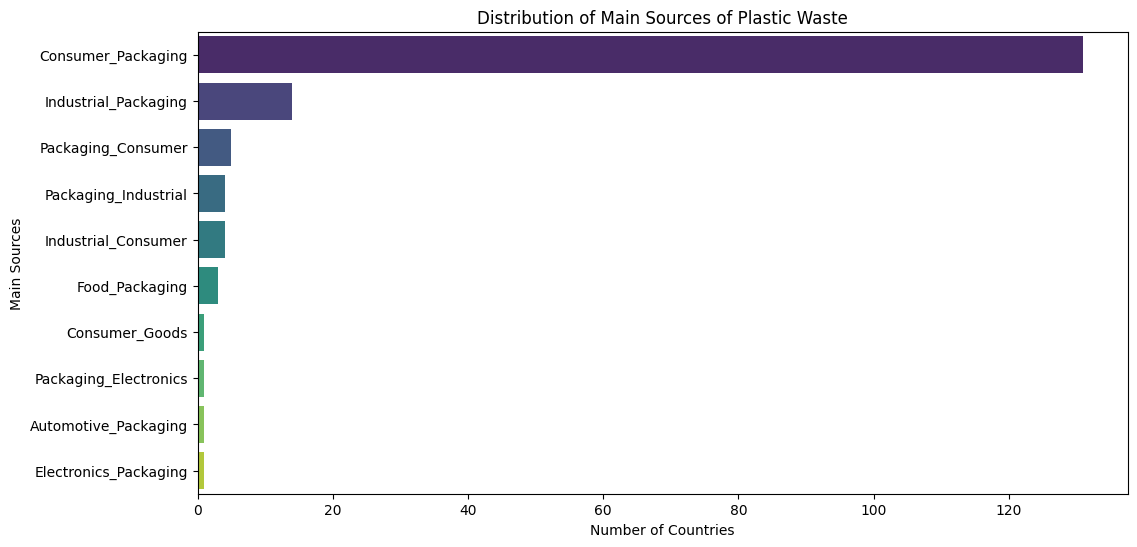

In [100]:
plt.figure(figsize=(12, 6))
sns.countplot(data=global_waste_df, y='Main_Sources', order=global_waste_df['Main_Sources'].value_counts().index, palette='viridis')

plt.title('Distribution of Main Sources of Plastic Waste')
plt.xlabel('Number of Countries')
plt.ylabel('Main Sources')
plt.show()

<h2> Coastal Risk </>

In [101]:
global_waste_df.loc[global_waste_df['Country']=='Philippines']

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
25,Philippines,1.63,Food_Packaging,9.1,14.8,Very_High


In [126]:
coastal_risk = global_waste_df['Coastal_Waste_Risk'].value_counts().sort_index()
coastal_risk

Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64

In [ ]:
# Filter rows where 'Category' is 'High'
## verhcoastal_risk = df[df['Category'] == 'High']

# Group by 'Country' column
##grouped = filtered_df.groupby('Country')

In [164]:
#Read CSV again because i messed up

df_copy = pd.read_csv("/Users/dee/Desktop/DA_Oct24/Final_project/Plastic Waste Around the World.csv")
df_copy.head(5)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [163]:
fig = px.choropleth(coastal_risk_sort,
                    locations="Country",  # Column with country names
                    locationmode="country names",  # Ensures Plotly recognizes the country names
                    color="Coastal_Waste_Risk",  # Column with the values to map
                    hover_name="Country",  # Column to show on hover
                    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale (you can try other scales like 'Plasma' or 'Cividis')
                    title="Coastal Waste Risk")

fig.show()

In [ ]:
## COASTAL WASTE RISK SORTING
# Define the custom order 
risk_order = ['Low', 'Medium', 'High', 'Very_High']

# Convert the column to a categorical type with the custom order
df_copy['Coastal_Waste_Risk'] = pd.Categorical(df_copy['Coastal_Waste_Risk'], categories=risk_order, ordered=True)


# Sort the DataFrame by the coastal_waste_risk column
coastal_risk_sort = df_copy.sort_values(by='Coastal_Waste_Risk')
coastal_risk_sort

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
142,Armenia,0.28,Consumer_Packaging,9.8,94.2,Low
143,Kyrgyzstan,0.25,Consumer_Packaging,4.5,37.8,Low
144,Tajikistan,0.22,Consumer_Packaging,3.2,22.7,Low
53,Belarus,1.09,Industrial_Consumer,7.2,115.7,Low
145,Turkmenistan,0.35,Consumer_Packaging,2.1,57.3,Low
...,...,...,...,...,...,...
164,Nauru,0.01,Consumer_Packaging,0.9,927.8,High
25,Philippines,1.63,Food_Packaging,9.1,14.8,Very_High
16,Vietnam,2.54,Food_Packaging,15.3,25.8,Very_High
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High


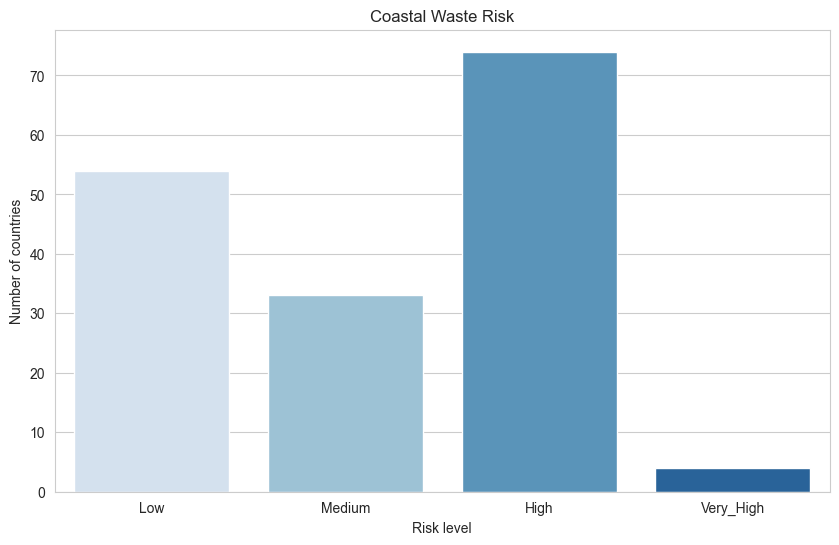

In [ ]:
## Coastal risk bar chart

plt.figure(figsize=(10, 6))
sns.countplot(data=coastal_risk_sort, x='Coastal_Waste_Risk',palette='Blues')

plt.title('Coastal Waste Risk')
plt.xlabel('Risk level')
plt.ylabel('Number of countries')
plt.show()

In [124]:
## Very high 

very_high_coastal_risk = global_waste_df[global_waste_df['Coastal_Waste_Risk'] == 'Very_High']
very_high_coastal_risk

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High
16,Vietnam,2.54,Food_Packaging,15.3,25.8,Very_High
25,Philippines,1.63,Food_Packaging,9.1,14.8,Very_High
149,Maldives,0.04,Consumer_Packaging,3.2,72.8,Very_High


In [ ]:
## High

high_coastal_risk = global_waste_df[global_waste_df['Coastal_Waste_Risk'] == 'High']
high_coastal_risk

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
2,India,26.33,Consumer_Goods,11.5,19.3,High
10,Mexico,4.43,Consumer_Packaging,6.7,34.2,High
13,Turkey,3.21,Consumer_Packaging,12.1,38.5,High
17,Thailand,2.41,Consumer_Packaging,17.6,34.5,High
...,...,...,...,...,...,...
160,Marshall Islands,0.01,Consumer_Packaging,1.8,168.5,High
161,Micronesia,0.01,Consumer_Packaging,1.5,86.3,High
162,Palau,0.01,Consumer_Packaging,12.3,437.2,High
163,Tuvalu,0.01,Consumer_Packaging,1.2,833.3,High


In [ ]:
## Medium

med_coastal_risk = global_waste_df[global_waste_df['Coastal_Waste_Risk'] == 'Medium']
med_coastal_risk

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,Medium
7,Russia,5.84,Industrial_Consumer,5.6,40.2,Medium
12,Italy,3.83,Packaging_Industrial,41.2,63.4,Medium
14,South Korea,2.91,Electronics_Packaging,59.1,56.7,Medium
15,Spain,2.58,Consumer_Packaging,37.8,54.9,Medium
21,Argentina,1.98,Consumer_Packaging,14.2,43.5,Medium
23,Australia,1.67,Consumer_Packaging,13.2,64.8,Medium
24,Saudi Arabia,1.65,Consumer_Packaging,4.5,46.9,Medium


In [ ]:
## Low

low_coastal_risk = global_waste_df[global_waste_df['Coastal_Waste_Risk'] == 'Low']
low_coastal_risk

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,Low
9,France,4.98,Packaging_Consumer,27.3,73.1,Low
11,Canada,3.89,Packaging_Consumer,9.4,102.1,Low
19,Poland,2.21,Packaging_Industrial,34.5,58.3,Low
22,Netherlands,1.78,Industrial_Packaging,55.9,102.8,Low
31,Belgium,1.52,Industrial_Packaging,43.2,131.2,Low
32,Sweden,1.51,Packaging_Industrial,50.6,146.3,Low
33,Austria,1.48,Industrial_Packaging,56.4,164.8,Low
36,Czech Republic,1.43,Industrial_Packaging,41.7,133.9,Low


In [172]:
global_waste_df.head(10)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,NaN
1,United States,42.02,Packaging_Consumer,32.1,127.5,NaN
2,India,26.33,Consumer_Goods,11.5,19.3,NaN
3,Japan,7.99,Packaging_Electronics,84.8,63.2,NaN
4,Germany,6.28,Automotive_Packaging,56.1,75.6,NaN
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,NaN
6,Indonesia,5.85,Food_Packaging,11.8,21.3,NaN
7,Russia,5.84,Industrial_Consumer,5.6,40.2,NaN
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,NaN
9,France,4.98,Packaging_Consumer,27.3,73.1,NaN


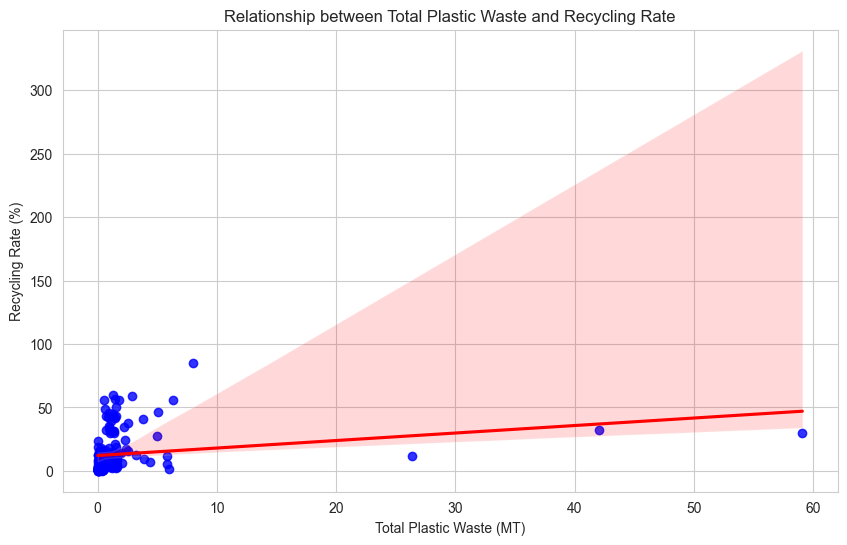

In [181]:
## Correlation of recycling rate and total plastic waste

plt.figure(figsize=(10, 6))
sns.regplot(data=global_waste_df, x='Total_Plastic_Waste_MT', y='Recycling_Rate', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Relationship between Total Plastic Waste and Recycling Rate')
plt.xlabel('Total Plastic Waste (MT)')
plt.ylabel('Recycling Rate (%)')
plt.show()

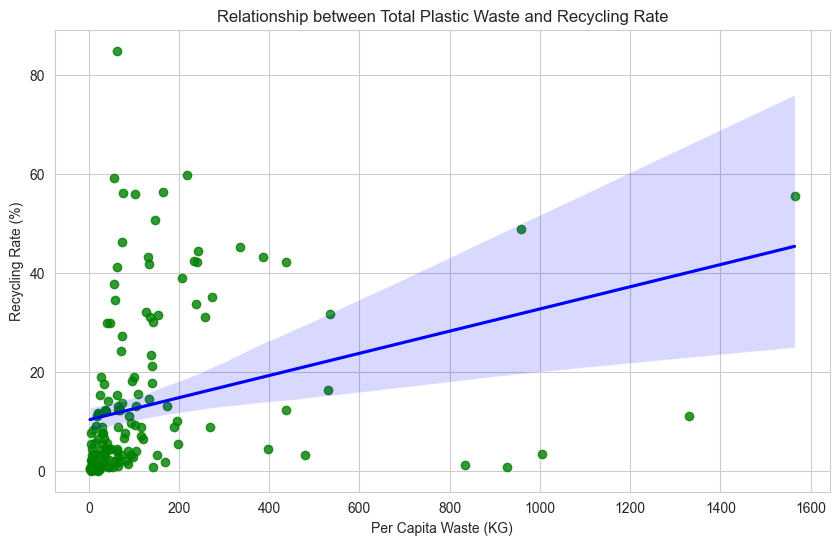

In [182]:
## Correlation recycling rate and per capita waste 

plt.figure(figsize=(10, 6))
sns.regplot(data=global_waste_df, x='Per_Capita_Waste_KG', y='Recycling_Rate', scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})

plt.title('Relationship between Total Plastic Waste and Recycling Rate')
plt.xlabel('Per Capita Waste (KG)')
plt.ylabel('Recycling Rate (%)')
plt.show()